#### Hierarchical clustering - Agglomerative Clustering Analysis on Image Data 

In [4]:
import time as time

import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt

import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.fixes import parse_version

In [11]:
data = coins()

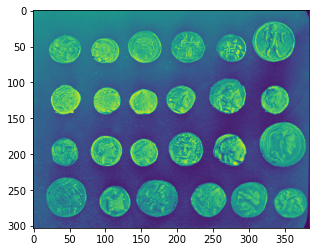

In [12]:
plt.imshow(data)

In [9]:
if parse_version(skimage.__version__)>=parse_version('0.14'):
    rescale_params = {'anti_aliasing': False, 'multichannel': False}
else:
    rescale_params = {}

In [13]:
# we have apply  Gaussian filter for smoothing prior to down-scaling
smoothened_coins  = gaussian_filter(data,sigma=2)
# we have to apply Rescale the  data
rescale_coins = rescale(smoothened_coins,0.2,mode='reflect',**rescale_params)

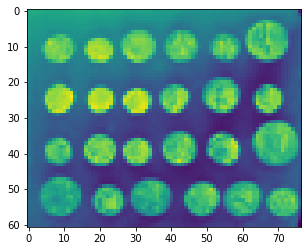

In [14]:
plt.imshow(rescale_coins)

In [15]:
X = np.reshape(rescale_coins, (-1,1))

In [16]:
Conn = grid_to_graph(*rescale_coins.shape)

In [18]:
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 27  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=Conn)

Compute structured hierarchical clustering...


In [19]:
ward.fit(X)

AgglomerativeClustering(connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int32'>'
	with 23209 stored elements in COOrdinate format>,
                        n_clusters=27)

In [20]:
label = np.reshape(ward.labels_,rescale_coins.shape)
label

array([[1, 1, 1, ..., 1, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

In [21]:
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Elapsed time:  78.634925365448
Number of pixels:  4697
Number of clusters:  27


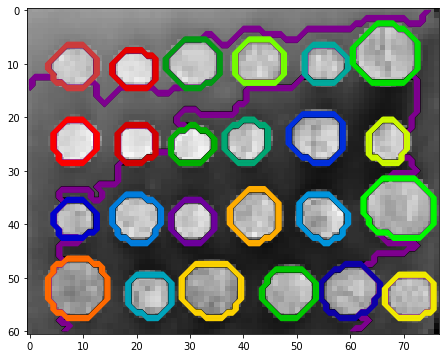

In [24]:
plt.figure(figsize=(16,6))
plt.imshow(rescale_coins,cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label==l,
               colors=[plt.cm.nipy_spectral(l/float(n_clusters))])
plt.xticks()
plt.yticks()
plt.show()